In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Terra Store dataset 
terra_store_data = pd.read_csv('../data/merged_data.csv')


In [2]:
terra_store_data

,product_id,category,price,ratings,customer_id,page_views,time_spent,purchase_date
0,101,Electronics,500,4.5,1,25,120,2023-01-01
1,101,Electronics,500,4.5,5,22,110,2023-01-05
2,102,Clothing,50,3.8,2,20,90,2023-01-02
3,102,Clothing,50,3.8,9,9,40,2023-01-21
4,102,Clothing,50,3.8,14,39,10,2023-02-15
...,...,...,...,...,...,...,...,...
101,152,Home & Kitchen,190,4.6,28,1,10,2023-03-24
102,153,Clothing,630,2.0,4,15,80,2023-01-24
103,153,Clothing,630,2.0,9,9,40,2023-03-06
104,153,Clothing,630,2.0,14,39,10,2023-02-04


In [3]:
# Display basic information about the dataset
print("Dataset Information:")
print(terra_store_data.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     106 non-null    int64  
 1   category       106 non-null    object 
 2   price          106 non-null    int64  
 3   ratings        106 non-null    float64
 4   customer_id    106 non-null    int64  
 5   page_views     106 non-null    int64  
 6   time_spent     106 non-null    int64  
 7   purchase_date  106 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 6.8+ KB
None


In [4]:
# Display summary statistics
print("\nSummary Statistics:")
print(terra_store_data.describe())




Summary Statistics:
       product_id        price     ratings  customer_id  page_views  \
count  106.000000   106.000000  106.000000   106.000000  106.000000   
mean   126.518868   478.584906    3.675472    14.481132   24.273585   
std     16.711690   342.215300    0.809563     9.048263    9.279299   
min    101.000000    20.000000    2.000000     1.000000    1.000000   
25%    112.500000   140.000000    3.125000     5.250000   20.000000   
50%    124.000000   475.000000    3.800000    14.000000   25.000000   
75%    142.500000   815.000000    4.200000    23.000000   30.000000   
max    154.000000  1000.000000    5.000000    29.000000   39.000000   

       time_spent  
count  106.000000  
mean    53.207547  
std     39.774296  
min     10.000000  
25%     30.000000  
50%     40.000000  
75%     72.500000  
max    150.000000  


In [5]:
# Check for missing values
missing_values = terra_store_data.isnull().sum()
print("\nMissing Values:")
print(missing_values)




Missing Values:
product_id       0
category         0
price            0
ratings          0
customer_id      0
page_views       0
time_spent       0
purchase_date    0
dtype: int64


In [7]:
# Handle missing values (replace NaN values with appropriate strategy)
# For example, you can replace missing ratings with the mean rating
terra_store_data['ratings'].fillna(terra_store_data['ratings'].mean(), inplace=True)



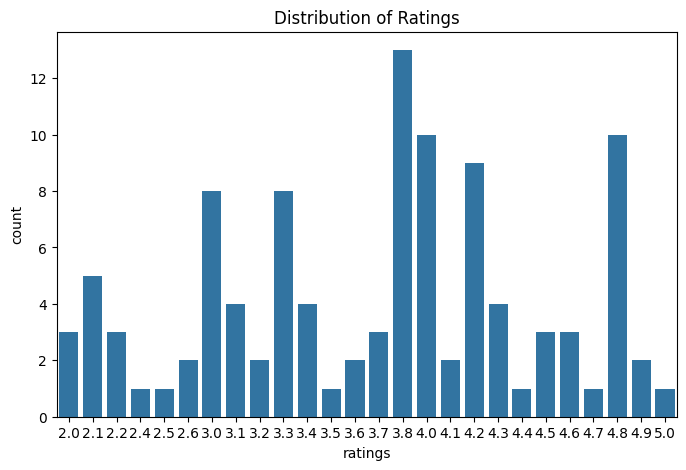

In [8]:
# Data Visualization
# Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='ratings', data=terra_store_data)
plt.title('Distribution of Ratings')
plt.show()



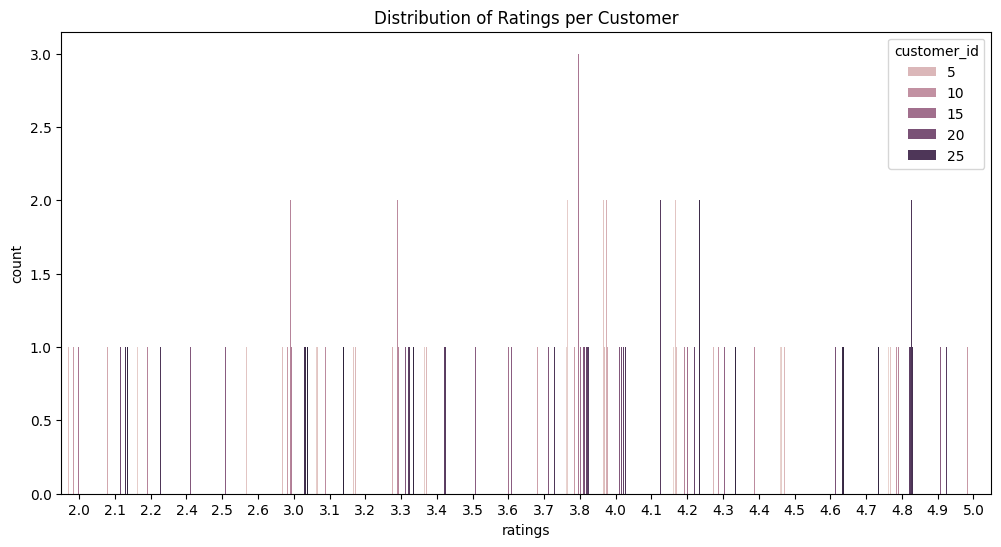

In [9]:
# Distribution of Ratings per Customer
plt.figure(figsize=(12, 6))
sns.countplot(x='ratings', hue='customer_id', data=terra_store_data)
plt.title('Distribution of Ratings per Customer')
plt.show()



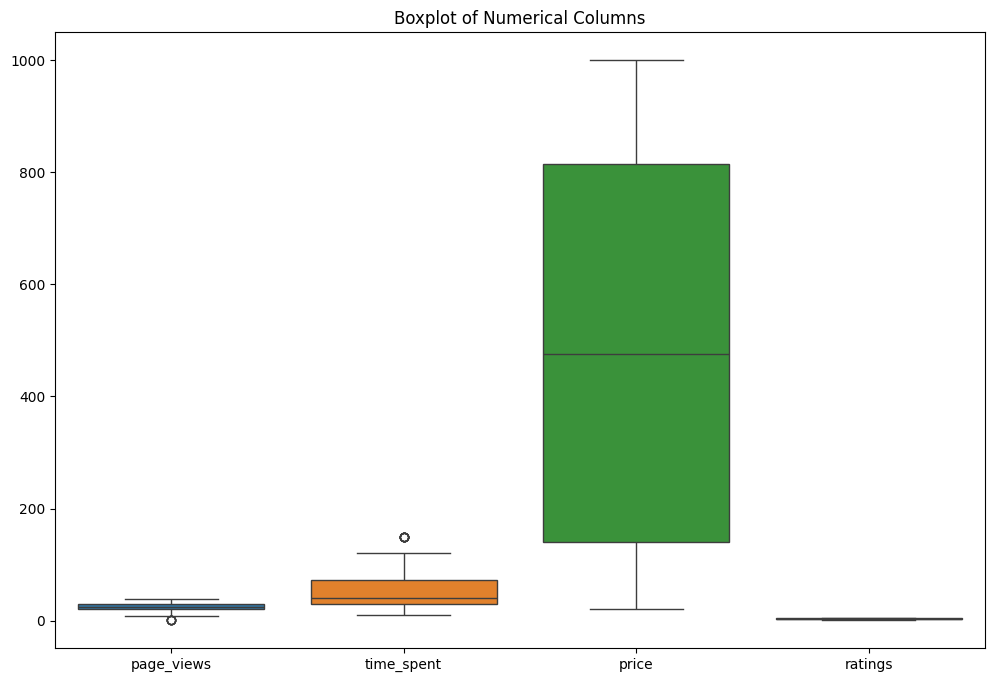

In [10]:
# Boxplot to identify outliers in numerical columns
numerical_columns = ['page_views', 'time_spent', 'price', 'ratings']
plt.figure(figsize=(12, 8))
sns.boxplot(data=terra_store_data[numerical_columns])
plt.title('Boxplot of Numerical Columns')
plt.show()



In [11]:
# Handle outliers (you can use different strategies based on the distribution)
# For example, you can cap extreme values in 'Time spent on the website' to the 80th percentile
time_spent_cap = terra_store_data['time_spent'].quantile(0.8)
terra_store_data['time_spent'] = terra_store_data['time_spent'].clip(upper=time_spent_cap)



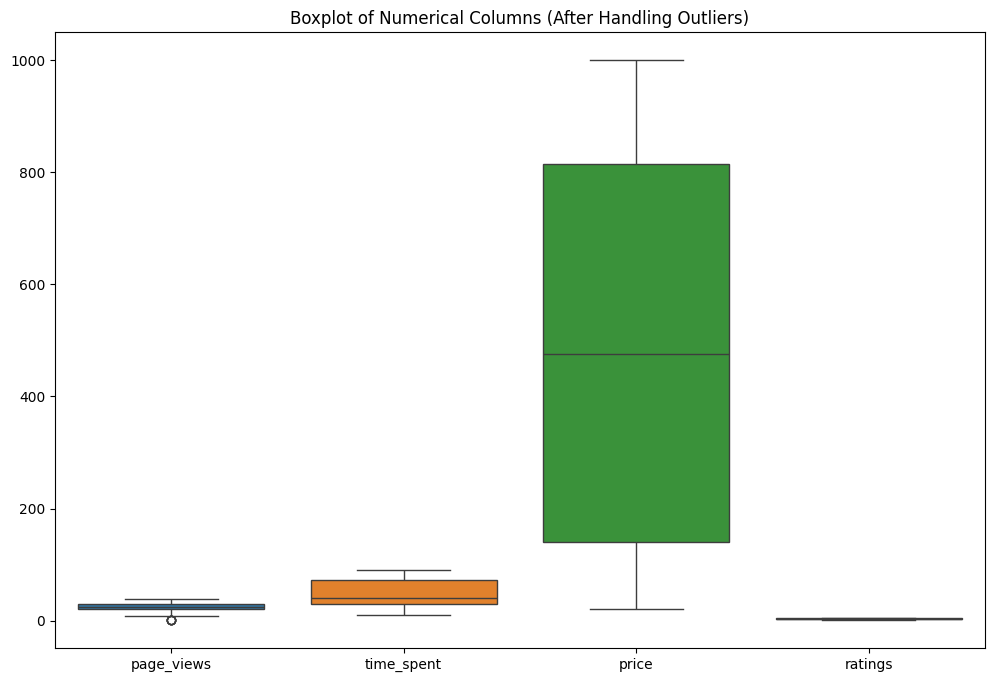

In [12]:
# Boxplot after handling outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=terra_store_data[numerical_columns])
plt.title('Boxplot of Numerical Columns (After Handling Outliers)')
plt.show()


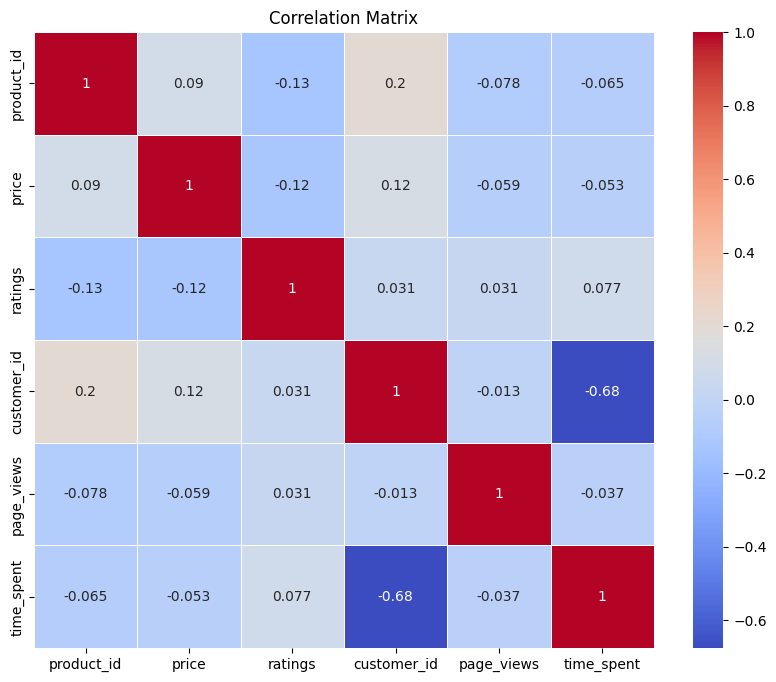

In [13]:
# Correlation matrix
correlation_matrix = terra_store_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

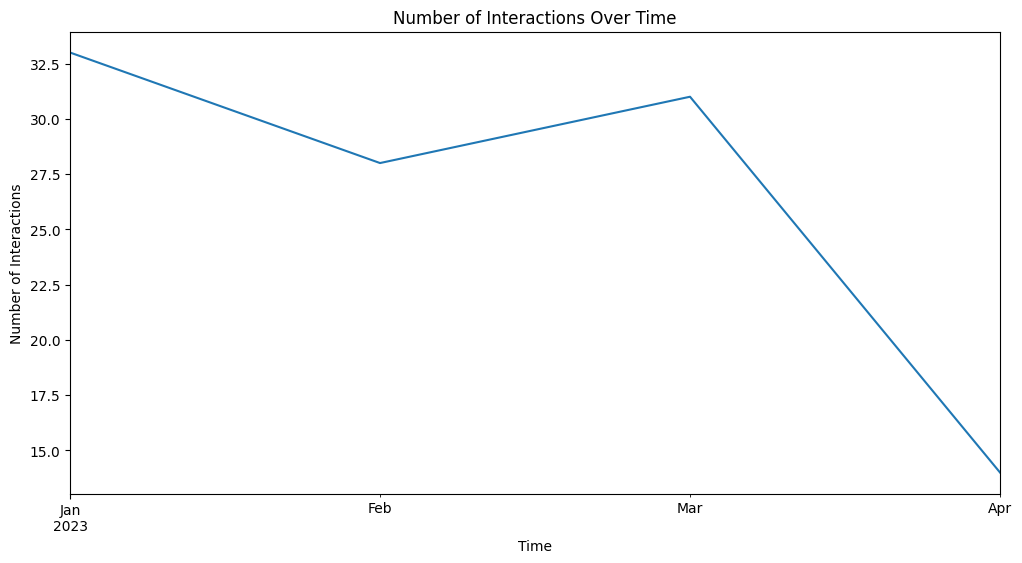

In [14]:

terra_store_data['purchase_date'] = pd.to_datetime(terra_store_data['purchase_date'])

# Plot the number of interactions over time
plt.figure(figsize=(12, 6))
terra_store_data.set_index('purchase_date')['ratings'].resample('M').count().plot()
plt.title('Number of Interactions Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Interactions')
plt.show()


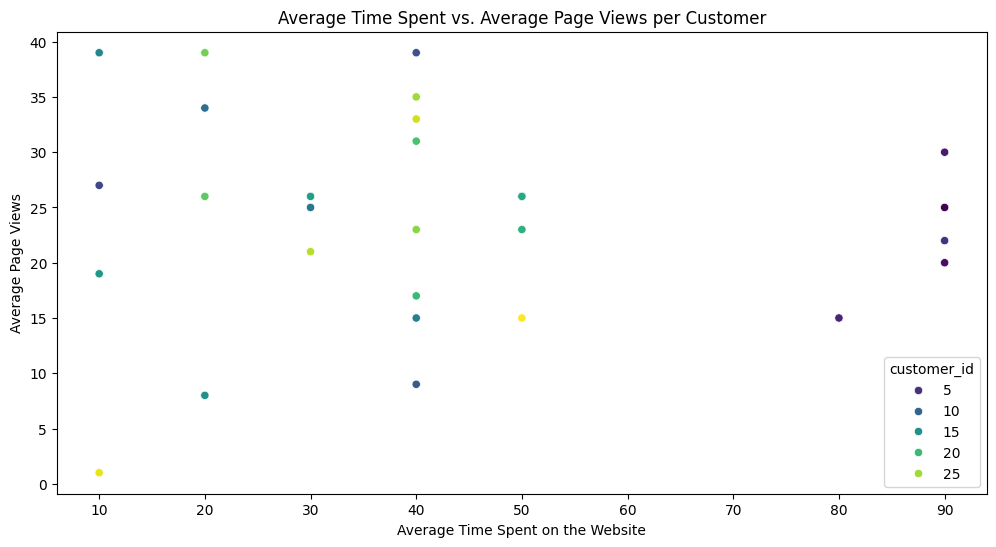

In [15]:
# User behavior analysis
avg_time_spent = terra_store_data.groupby('customer_id')['time_spent'].mean()
avg_page_views = terra_store_data.groupby('customer_id')['page_views'].mean()

# Plot average time spent and page views per customer
plt.figure(figsize=(12, 6))
sns.scatterplot(x=avg_time_spent, y=avg_page_views, hue=avg_time_spent.index, palette='viridis')
plt.title('Average Time Spent vs. Average Page Views per Customer')
plt.xlabel('Average Time Spent on the Website')
plt.ylabel('Average Page Views')
plt.show()

In [16]:
# Feature engineering example: Create a binary variable indicating high-priced products
terra_store_data['HighPricedProduct'] = (terra_store_data['price'] > terra_store_data['price'].mean()).astype(int)
terra_store_data['HighPricedProduct'] 

0      1
1      1
2      0
3      0
4      0
      ..
101    0
102    1
103    1
104    1
105    1
Name: HighPricedProduct, Length: 106, dtype: int32

In [17]:
from scipy.stats import ttest_ind

# Example of a t-test between two groups (e.g., high-rated vs. low-rated products)
high_rated_products = terra_store_data[terra_store_data['ratings'] >= 4]
low_rated_products = terra_store_data[terra_store_data['ratings'] < 4]

t_stat, p_value = ttest_ind(high_rated_products['page_views'], low_rated_products['page_views'])

print(f'T-statistic: {t_stat}, p-value: {p_value}')


T-statistic: -0.07535200744714779, p-value: 0.9400793992390193
